<a href="https://colab.research.google.com/github/sharad28/Fun_implementation/blob/main/NLP/letter-embedding_sparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import urllib.request as req

In [3]:
#download csv file from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SYBGZL
filename = '/content/abcnews-date-text.csv'

In [4]:
headlines = pd.read_csv(filename)
headlines = headlines['headline_text']

In [5]:
headlines.head()    

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [6]:
def sliding_window(text):
  N = len(text) - 1
  for i in range(N):
    yield text[i],text[i+1]


In [7]:
import itertools as it

In [8]:
window = list(it.chain(*[sliding_window(txt) for txt in headlines[:10000]]))

In [10]:
char = pd.DataFrame(window)[0].unique()

In [11]:
mapping = {char : idx for idx,char in enumerate(char) }


In [14]:
# [mapping[w[0]] for w in window]

In [20]:
integer_in = np.array([mapping[w[0]] for w in window])
integer_in.shape

(386880,)

In [45]:
integer_out = np.array([mapping[w[1]] for w in window])
integer_out

array([ 1,  0,  2, ..., 16, 11, 19])

In [17]:
num_letters = len(mapping)
num_letters

37

In [18]:
emb_layer = tf.keras.layers.Embedding(num_letters,2,input_length=1 )
model = tf.keras.Sequential(emb_layer)

In [19]:
out_array = model.predict(integer_in)
out_array.shape

(386880, 1, 2)

In [24]:
import matplotlib.pyplot as plt



In [25]:
idx_of_char = np.array(list(mapping.values())) 
idx_of_char 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [27]:
translator = {idx:char for char,idx in mapping.items()}
translator

{0: 'a',
 1: 'b',
 2: ' ',
 3: 'd',
 4: 'e',
 5: 'c',
 6: 'i',
 7: 's',
 8: 'g',
 9: 'n',
 10: 't',
 11: 'o',
 12: 'm',
 13: 'u',
 14: 'y',
 15: 'r',
 16: 'l',
 17: 'f',
 18: 'w',
 19: 'p',
 20: 'z',
 21: 'k',
 22: 'v',
 23: 'j',
 24: 'h',
 25: 'q',
 26: '1',
 27: '0',
 28: 'x',
 29: '8',
 30: '3',
 31: '4',
 32: '5',
 33: '2',
 34: '6',
 35: '7',
 36: '9'}

In [30]:
idx_of_char = np.array([list(mapping.values())]).T 
idx_of_char.shape

(37, 1)

In [35]:

preds = model.predict(idx_of_char)
preds.shape

(37, 1, 2)

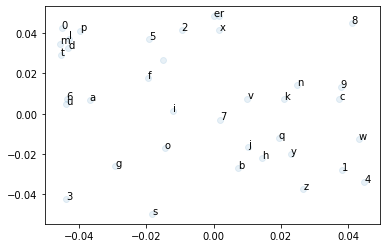

In [44]:
plt.scatter(preds[:,0,0],preds[:,0,1],alpha=.1)
# plt.subplots(figsize=(6, 2))
for i , idx in enumerate(idx_of_char):
  plt.text(preds[i,0,0], preds[i,0,1],translator[idx[0]])
  
plt.show()  

In [42]:

layers = [
    emb_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_letters,activation='softmax')
]
model_pred = tf.keras.Sequential(layers) 

In [43]:
model_pred.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 2)              74        
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 37)                111       
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [46]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_pred.compile(adam,"sparse_categorical_crossentropy",metrics=['accuracy'])

In [47]:
out = model_pred.predict(integer_in)
out.shape

(386880, 37)

In [48]:
integer_out.shape

(386880,)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
integer_out = integer_out.reshape(-1,1)
integer_out.shape

(386880, 1)

In [ ]:
to_predict = OneHotEncoder(sparse=False).fit_transform(integer_out)
to_predict

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
model_pred.fit(integer_in, integer_out, epochs=30)

Epoch 1/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.7421 - accuracy: 0.1826
Epoch 2/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6712 - accuracy: 0.1901
Epoch 3/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6683 - accuracy: 0.1947
Epoch 4/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.6672 - accuracy: 0.1964
Epoch 5/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6664 - accuracy: 0.1962
Epoch 6/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6658 - accuracy: 0.1962
Epoch 7/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.6653 - accuracy: 0.1962
Epoch 8/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6649 - accuracy: 0.1965
Epoch 9/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6646 - accuracy: 0.1963
Epoch 10/30
12090/12090 [==============================

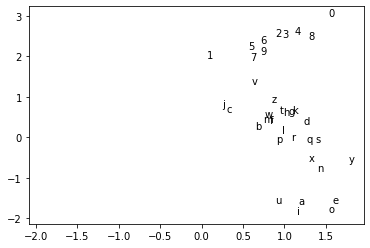

In [51]:
preds = model.predict(idx_of_char)
plt.scatter(preds[:,0,0],preds[:,0,1],alpha=0)
for i , idx in enumerate(idx_of_char):
  plt.text(preds[i,0,0], preds[i,0,1],translator[idx[0]])
plt.show()